In [1]:
#Split and scale the data, train hyper parameters, Model, Evaluate

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn import cross_validation, metrics  
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import pandas as pd
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


%store -r df

print(df.info())
print(df.shape)


   

C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 0 to 999
Data columns (total 14 columns):
search_word                  989 non-null object
contentDetails.caption       989 non-null bool
contentDetails.definition    989 non-null object
catID                        989 non-null int64
description                  975 non-null object
localized.description        974 non-null object
localized.title              989 non-null object
tags                         930 non-null object
title                        989 non-null object
commentCount                 989 non-null float64
dislikeCount                 989 non-null float64
likeCount                    989 non-null float64
view_bucket                  989 non-null float64
date                         989 non-null datetime64[ns, UTC]
dtypes: bool(1), datetime64[ns, UTC](1), float64(4), int64(1), object(7)
memory usage: 109.1+ KB
None
(989, 14)


C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
minmax_scale = preprocessing.MinMaxScaler().fit(df[['commentCount','dislikeCount','likeCount']])




X = pd.DataFrame(minmax_scale.transform(df[['commentCount','dislikeCount','likeCount']]))
print(X.shape)
Y = df['view_bucket']

n = pd.get_dummies(df[['search_word','contentDetails.definition','contentDetails.caption']])

# X = pd.concat([X, n], axis=1)
print(X.shape)





(989, 3)
(989, 3)


In [3]:
#X = pd.concat([X, n], axis=1)
X = pd.DataFrame(np.hstack([X,n]))
X.shape



(989, 26)

In [4]:
# Normalize the time series data and store as new date column
ts = df['date']
scaled_ts = (ts-ts.min())/(ts.max()-ts.min())

X['date'] = pd.Series(scaled_ts)
X['date'].fillna((X['date'].mean()), inplace=True)

print(X.shape)


(989, 27)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=.9, random_state=0)

X_train.info()



C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 304 to 684
Data columns (total 27 columns):
0       890 non-null object
1       890 non-null object
2       890 non-null object
3       890 non-null object
4       890 non-null object
5       890 non-null object
6       890 non-null object
7       890 non-null object
8       890 non-null object
9       890 non-null object
10      890 non-null object
11      890 non-null object
12      890 non-null object
13      890 non-null object
14      890 non-null object
15      890 non-null object
16      890 non-null object
17      890 non-null object
18      890 non-null object
19      890 non-null object
20      890 non-null object
21      890 non-null object
22      890 non-null object
23      890 non-null object
24      890 non-null object
25      890 non-null object
date    890 non-null float64
dtypes: float64(1), object(26)
memory usage: 194.7+ KB


In [6]:


model = sm.OLS(list(y_train), X_train.astype(float)).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     89.54
Date:                Thu, 27 Dec 2018   Prob (F-statistic):          5.96e-220
Time:                        18:56:29   Log-Likelihood:                -6136.2
No. Observations:                 890   AIC:                         1.232e+04
Df Residuals:                     864   BIC:                         1.245e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0          -1771.5925    300.587     -5.894      0.0

In [7]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
print('Linear Regression R squared: %.4f' % regressor.score(X_test, y_test))

lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

lin_mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: %.4f' % lin_mae)



Linear Regression R squared: 0.7739
Linear Regression RMSE: 323.3618
Linear Regression MAE: 117.6755


In [8]:
# predictors=list(X_train)
# feat_imp = pd.Series(regressor.feature_importances_, predictors).sort_values(ascending=False)
# feat_imp.plot(kind='bar', title='Importance of Features')
# plt.ylabel('Feature Importance Score')
# print('Accuracy of the linear regression model on test set: {:.3f}'.format(regressor.score(X_test, y_test)))
# pred=regressor.predict(X_test)
# print(classification_report(y_test, pred))

In [9]:
# Try random forest with default hyperparameters
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [10]:
print('Random Forest R squared: %.4f' % forest_reg.score(X_test, y_test))
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest R squared: 0.2743
Random Forest RMSE: 579.3618


In [11]:
# Evaluate and select optimal hyperparameters
print(forest_reg.get_params())

#Create a random grid for possible parameters to attempt and then use random search

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': 1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [12]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.1min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [13]:
#Print and evaluate best parameters from the search
print(rf_random.best_params_)

best_random = rf_random.best_estimator_

{'n_estimators': 1600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}


In [14]:
#Evaluate performance of the base model w/ searched hyperparameters

random_model = RandomForestRegressor(n_estimators = 200, min_samples_split=2, min_samples_leaf=1, 
                                   max_features = 'sqrt', max_depth = 50, bootstrap = True, random_state = 42)




In [15]:
random_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [16]:
#Evaluate performance of random forest with random searched hyperparameters
print('Random Forest R squared: %.4f' % random_model.score(X_test, y_test))
y_pred = random_model.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest R squared: 0.7320
Random Forest RMSE: 352.0735


In [17]:
# Try Grid Search to see if we can improve the hyperparameters further. 
# Setting grid around the previously identified optimal values
param_grid = {
    'bootstrap': [True],
    'max_depth': [30, 40, 50, 60, 70],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4, 5],
    'n_estimators': [100, 200, 300, 1000]
}


In [18]:
# Create a based model
rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring = 'neg_mean_squared_error',
                          cv = 3, n_jobs = -1, verbose = 2)

In [19]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  3.5min finished


{'bootstrap': True,
 'max_depth': 60,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [20]:
#Evaluate performance of random forest with grid search hyperparameters
print('Random Forest R squared: %.4f' % grid_search.score(X_test, y_test))
y_pred = grid_search.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest R squared: -116234.1245
Random Forest RMSE: 340.9313


In [21]:
# Try Gradient Boosting
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [22]:
print('Gradient Boosting R squared": %.4f' % model.score(X_test, y_test))
y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting R squared": 0.0033
Gradient Boosting RMSE: 678.9475


In [23]:
print(model.get_params())

{'alpha': 0.9, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'presort': 'auto', 'random_state': None, 'subsample': 1.0, 'verbose': 0, 'warm_start': False}


In [24]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 2, 3, 4, 5, 6, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [25]:
#Basic GBM Regressor performance was poor - try tuning learning rate and number of trees
gbm = GradientBoostingRegressor()

gbm_random = RandomizedSearchCV(estimator = gbm, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
gbm_random.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.1min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 2, 3, 4, 5, 6, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [26]:
#Print and evaluate best parameters from the search
print(gbm_random.best_params_)

best_random = gbm_random.best_estimator_

{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 4}


In [27]:
#Evaluate performance of the base model w/ searched hyperparameters

random_model = RandomForestRegressor(n_estimators = 1788, min_samples_split=10, min_samples_leaf=1, 
                                   max_features = 'sqrt', max_depth = 3, random_state = 42)

In [28]:
random_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=1788, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [29]:
#Evaluate performance of random forest with random searched hyperparameters
print('GBM - random searched R squared: %.4f' % random_model.score(X_test, y_test))
y_pred = random_model.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('GBM - random searched RMSE: %.4f' % forest_rmse)

GBM - random searched R squared: 0.6714
GBM - random searched RMSE: 389.8599


Accuracy of the GBM on test set: 0.671


ValueError: Mix type of y not allowed, got types {'multiclass', 'continuous'}

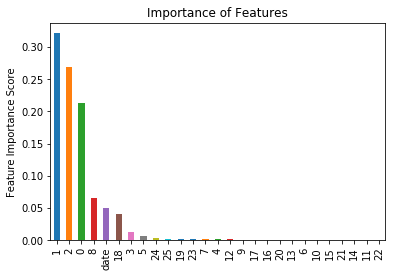

In [30]:
predictors=list(X_train)
feat_imp = pd.Series(random_model.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(random_model.score(X_test, y_test)))
pred=random_model.predict(X_test)
print(classification_report(y_test, pred))

In [ ]:
print(y_test.value_counts())